In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv('CreditCard_dataset.csv')

#drop customer ID column
data.drop(columns=['CUST_ID'], inplace=True)

#replace null values with zeros
data['MINIMUM_PAYMENTS'].fillna(0, inplace=True)

scaler = StandardScaler()
scale_data = scaler.fit_transform(data)
scale_data = pd.DataFrame(scale_data, columns=data.columns)

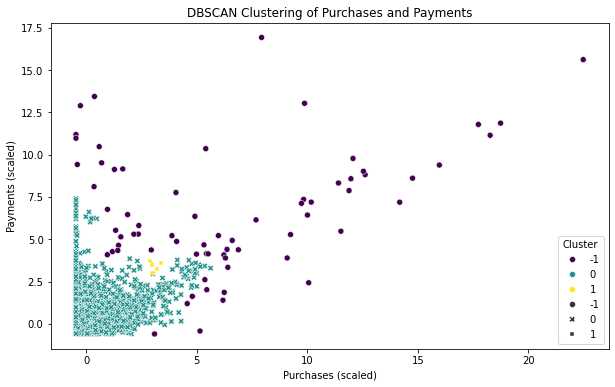

array([   0, 8875,    5])

In [3]:

# Select the features for clustering
features = scale_data[['PURCHASES', 'PAYMENTS']]  

# Apply DBSCAN to the selected features
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(features)


# Create a DataFrame for plotting
plot_data = pd.DataFrame(features, columns=['PURCHASES', 'PAYMENTS'])
plot_data['Cluster'] = clusters

# Count the number of points in each cluster
cluster_counts_ = np.bincount(clusters[clusters >= 0] + 1)  #  handling for noise

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data, x='PURCHASES', y='PAYMENTS', hue='Cluster', palette='viridis', style=clusters, markers=True)
plt.title('DBSCAN Clustering of Purchases and Payments')
plt.xlabel('Purchases (scaled)')
plt.ylabel('Payments (scaled)')
plt.legend(title='Cluster')
plt.show()

cluster_counts_